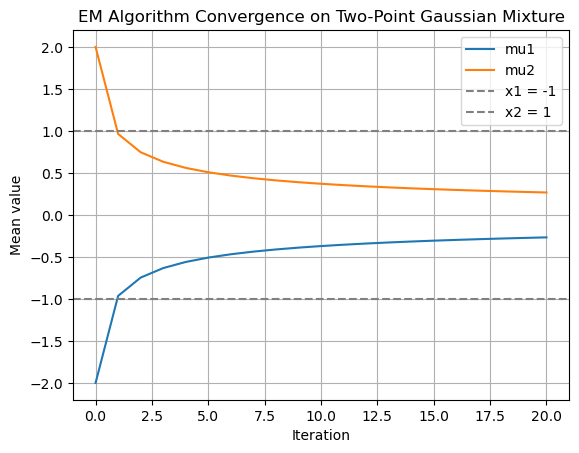

array([-0.26720885,  0.26720885])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
x = np.array([-1.0, 1.0])

# Fixed parameters
sigma = 1.0
pi = np.array([0.5, 0.5])  # equal weights

# Initialize means
mu = np.array([-2.0, 2.0])
mu_trace = [mu.copy()]

# EM algorithm
def em_step(x, mu, sigma, pi):
    # E-step: compute responsibilities
    r = np.zeros((len(x), 2))
    for k in range(2):
        r[:, k] = pi[k] * norm.pdf(x, loc=mu[k], scale=sigma)
    r /= r.sum(axis=1, keepdims=True)
    
    # M-step: update means
    N_k = r.sum(axis=0)
    mu_new = (r * x[:, np.newaxis]).sum(axis=0) / N_k
    return mu_new, r

# Run EM for multiple iterations
for i in range(20):
    mu, r = em_step(x, mu, sigma, pi)
    mu_trace.append(mu.copy())

mu_trace = np.array(mu_trace)

# Plot the convergence of the means
plt.plot(mu_trace[:, 0], label='mu1')
plt.plot(mu_trace[:, 1], label='mu2')
plt.axhline(-1, color='gray', linestyle='--', label='x1 = -1')
plt.axhline(1, color='gray', linestyle='--', label='x2 = 1')
plt.xlabel("Iteration")
plt.ylabel("Mean value")
plt.title("EM Algorithm Convergence on Two-Point Gaussian Mixture")
plt.legend()
plt.grid(True)
plt.show()

mu_trace[-1]


In [2]:
import numpy as np
from scipy.stats import norm

# Step 1: Data and initialization
x = np.array([-1.0, 1.0])
mu1 = -2.0
mu2 = 2.0
sigma = 1.0  # fixed variance

# Step 2: E-step – compute responsibilities (soft assignments)
# For each point, compute probability under each Gaussian
p1 = norm.pdf(x, loc=mu1, scale=sigma)
p2 = norm.pdf(x, loc=mu2, scale=sigma)

# Responsibilities (probability of belonging to each component)
r1 = p1 / (p1 + p2)  # responsibility for component 1
r2 = 1 - r1          # responsibility for component 2

# Step 3: M-step – update means using responsibilities
mu1_new = np.sum(r1 * x) / np.sum(r1)
mu2_new = np.sum(r2 * x) / np.sum(r2)

# Show result
print("Updated mu1:", mu1_new)
print("Updated mu2:", mu2_new)


Updated mu1: -0.9640275800758169
Updated mu2: 0.9640275800758169


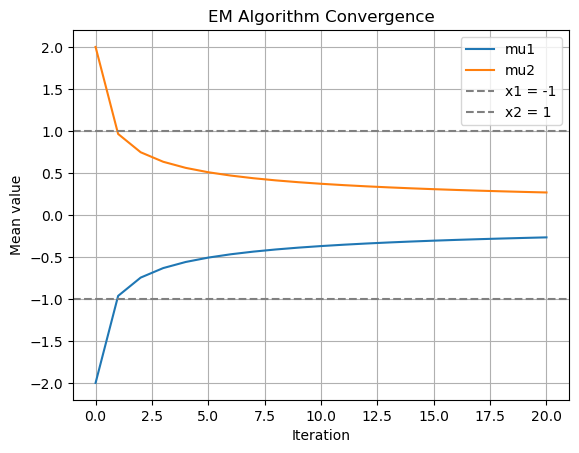

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Step 1: Data and initialization
x = np.array([-1.0, 1.0])
mu1 = -2.0
mu2 = 2.0
sigma = 1.0
max_iters = 20

# Store mu values to track convergence
mu1_list = [mu1]
mu2_list = [mu2]

# Step 2: EM iterations
for i in range(max_iters):
    # --- E-step ---
    p1 = norm.pdf(x, loc=mu1, scale=sigma)
    p2 = norm.pdf(x, loc=mu2, scale=sigma)
    
    r1 = p1 / (p1 + p2)  # responsibilities for component 1
    r2 = 1 - r1          # responsibilities for component 2

    # --- M-step ---
    mu1 = np.sum(r1 * x) / np.sum(r1)
    mu2 = np.sum(r2 * x) / np.sum(r2)

    mu1_list.append(mu1)
    mu2_list.append(mu2)

# Step 3: Plotting the convergence
plt.plot(mu1_list, label="mu1")
plt.plot(mu2_list, label="mu2")
plt.axhline(-1, color='gray', linestyle='--', label="x1 = -1")
plt.axhline(1, color='gray', linestyle='--', label="x2 = 1")
plt.xlabel("Iteration")
plt.ylabel("Mean value")
plt.title("EM Algorithm Convergence")
plt.legend()
plt.grid(True)
plt.show()
